In [ ]:
import matplotlib.pyplot as plt
import matplotlib.collections as clt
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sns
from tifffile import imread
import pickle
from skimage.color import label2rgb
from skimage.measure import label, regionprops
from scipy.spatial.distance import cdist
import copy
from sklearn.metrics import confusion_matrix
from matplotlib_scalebar.scalebar import ScaleBar
from mpl_toolkits.axes_grid1.inset_locator import mark_inset

In [ ]:
font = {
        'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 7
        }
padding = {
    'titlepad': 3,
    'labelpad': 1,
}
matplotlib.rc('font', **font)
matplotlib.rc('axes', **padding)

In [ ]:
fig, axs = plt.subplots(figsize=(7, 4), dpi=600, ncols=5, nrows=3, layout='tight')

axs = axs.flat

for i, name in zip(range(5), ['Raw', 'No noise modeling', 'Noise modeling 10', 'Noise modeling 20', 'Noise modeling 30']):
    ax = axs[i]
    ax.set_title(name)

for i, name in zip(range(3), ['Image patch', 'Block pattern', 'Extracted line']):
    ax = axs[i*5]
    ax.set_ylabel(name)
    
for i, name in zip(range(5), ['raw', 'grain0', 'grain10', 'grain20', 'grain30']):
    if name == 'raw':
        dset = imread(f'tmp/{name}.tif')[0, ...].astype(float)
        dset = dset / np.amax(dset) * 255
        dset = dset.astype(np.uint8)
    else:
        dset = imread(f'tmp/{name}.tif')[0, ...]
    axs[i].imshow(dset/np.amax(dset), cmap='gray')
    axs[i+5].imshow(imread(f'tmp/{name}_shift.tif')[0, ...], cmap='gray', vmin=0, vmax=20)
    axs[i+10].imshow(imread(f'tmp/{name}_line.tif')[0, ...], cmap='gray')
    
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

plt.savefig('grain.pdf', bbox_inches='tight')

In [ ]:
inx1, inx2, iny1, iny2 = 70, 102, 32, 64

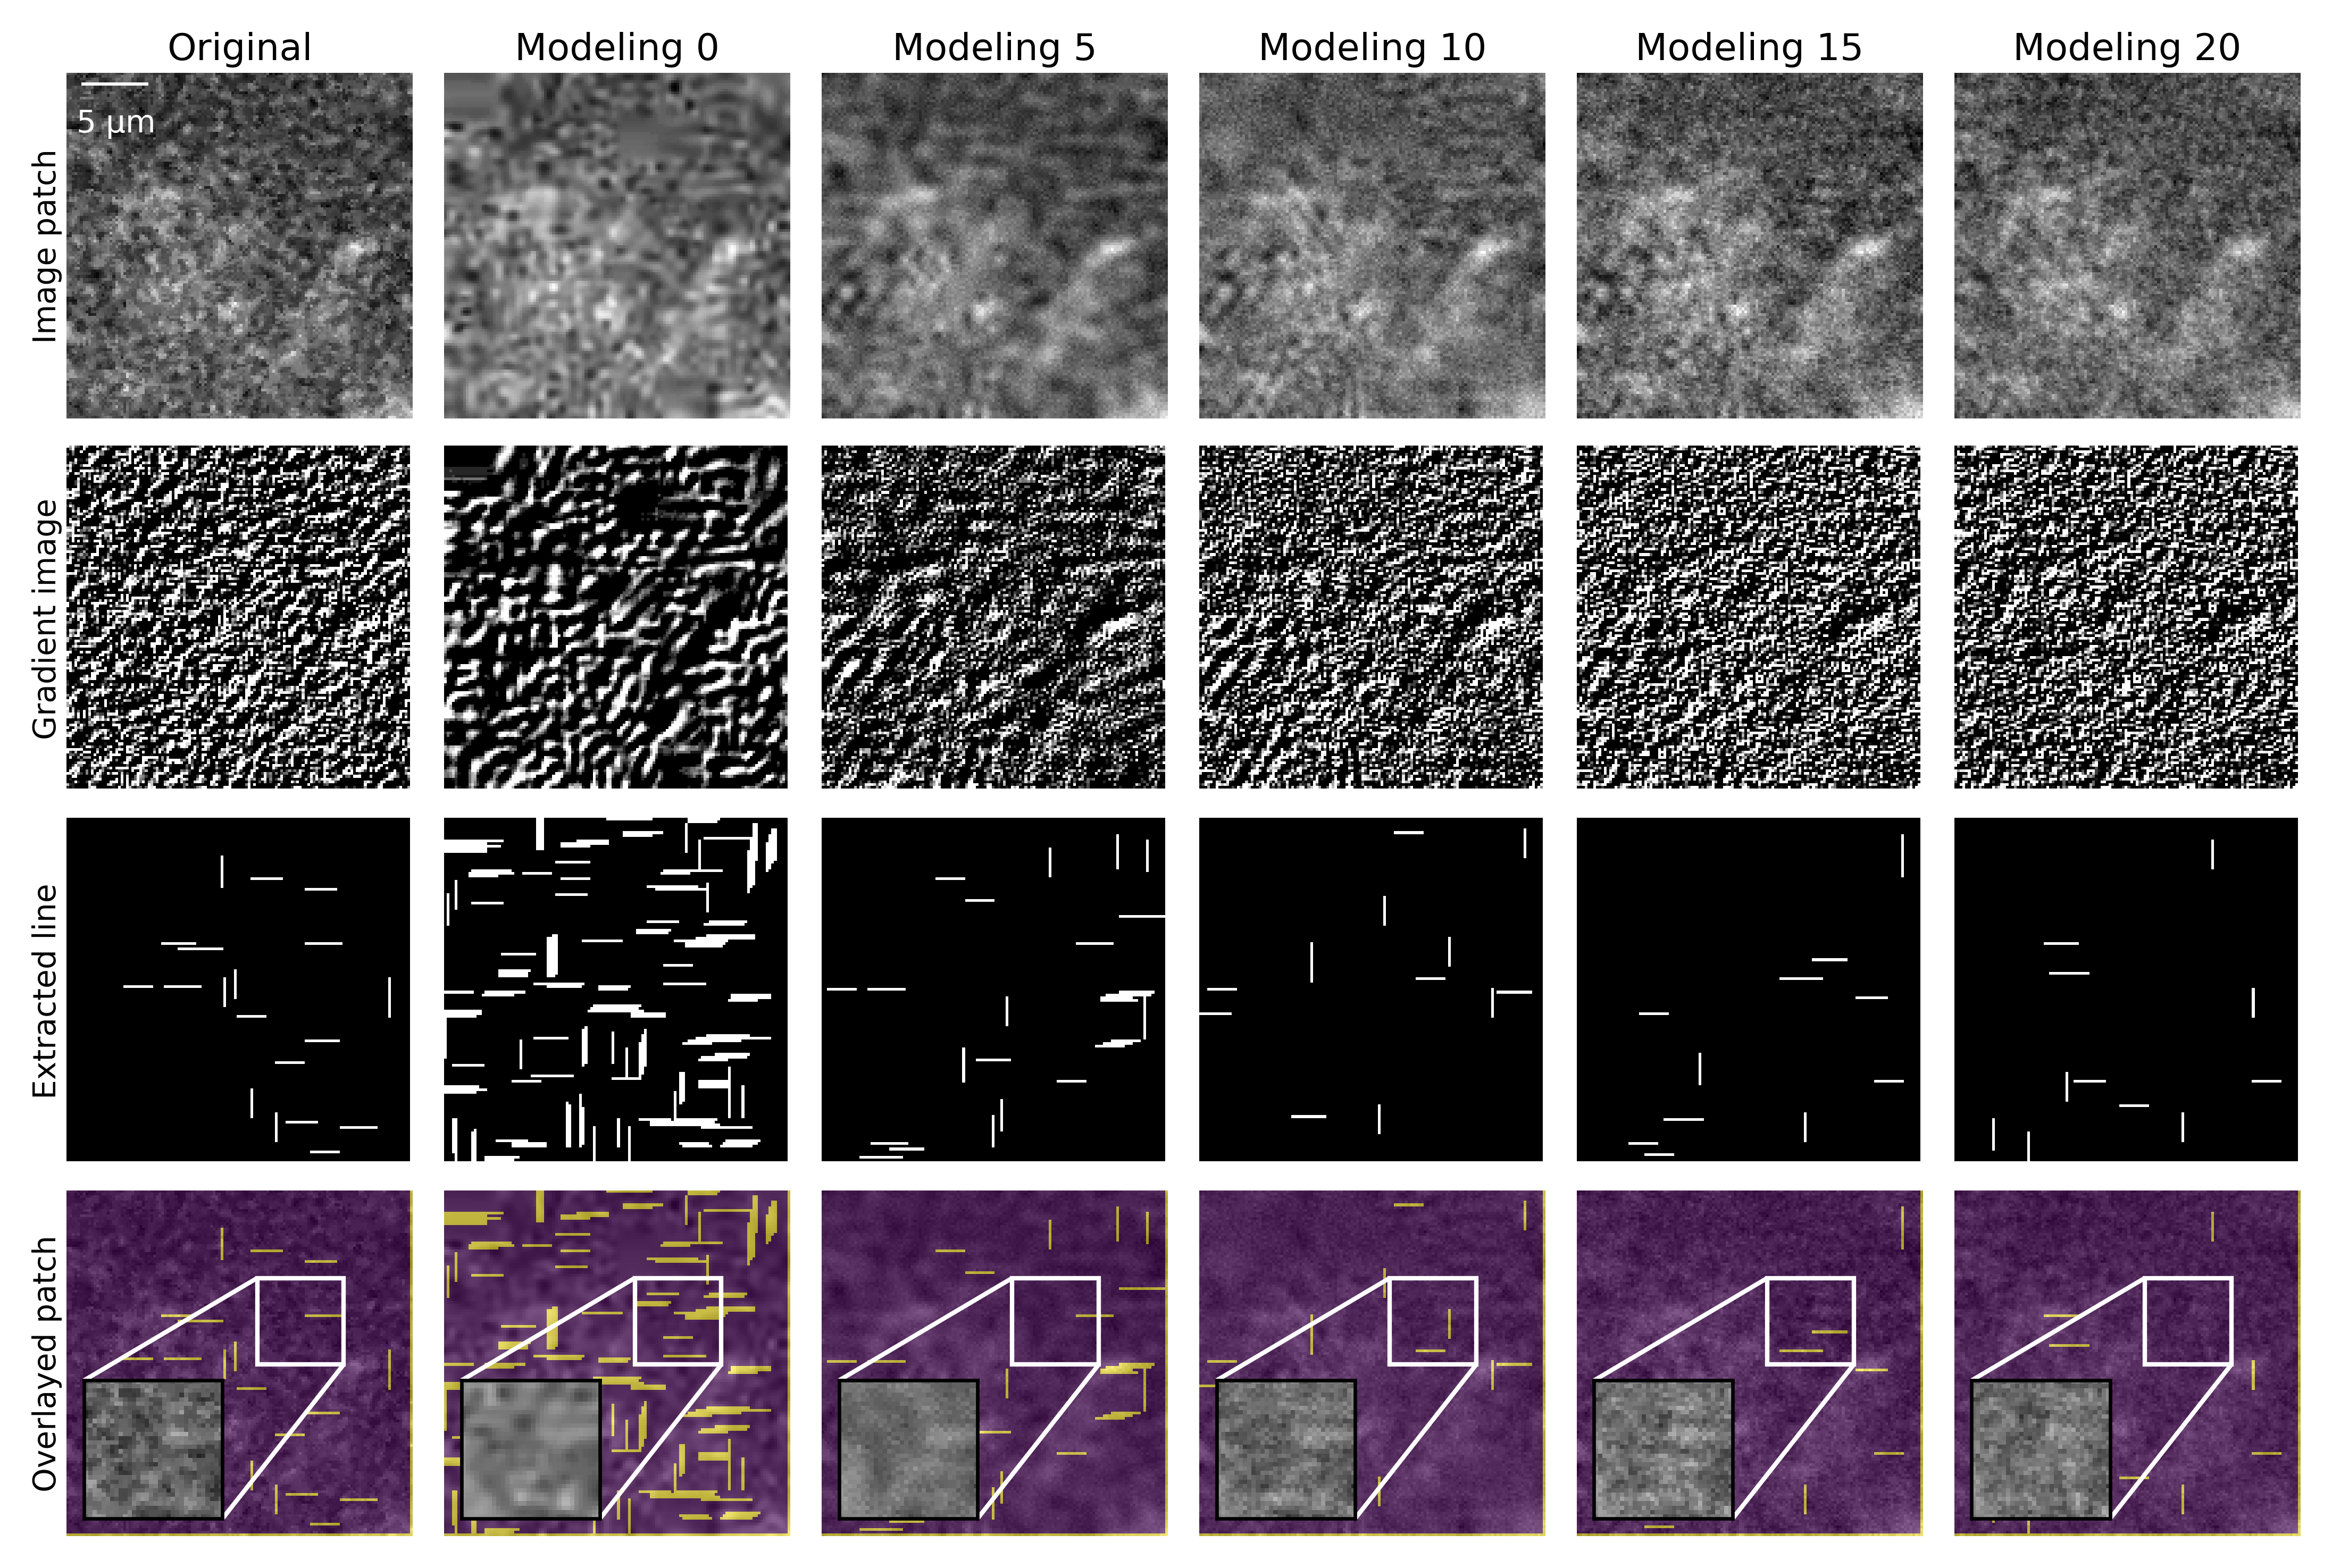

In [7]:
fig, axs = plt.subplots(figsize=(7.2, 4.8), dpi=600, ncols=6, nrows=4, layout='constrained')

axs = axs.flat

for i, name in zip(range(6), ['Original', 'Modeling 0', 'Modeling 5', 'Modeling 10', 'Modeling 15', 'Modeling 20']):
    ax = axs[i]
    ax.set_title(name)

for i, name in zip(range(4), ['Image patch', 'Gradient image', 'Extracted line', 'Overlayed patch']):
    ax = axs[i*6]
    ax.set_ylabel(name)
    
for i, name in zip(range(6), ['raw', 'grain0', 'grain5', 'grain10', 'grain15', 'grain20']):
    if name == 'raw':
        dset = imread(f'tmp/{name}.tif')[0, ...].astype(float)
        dset = dset / np.amax(dset) * 255
        dset = dset.astype(np.uint8)
    else:
        dset = imread(f'tmp/{name}.tif')[0, ...]
    axs[i].imshow(dset/np.amax(dset), cmap='gray')
    axs[i+6].imshow(imread(f'tmp/{name}_shift.tif')[0, ...], cmap='gray', vmin=0, vmax=20)
    axs[i+12].imshow(imread(f'tmp/{name}_line.tif')[0, ...], cmap='gray')
    axs[i+18].imshow(dset/np.amax(dset), cmap='gray')
    axs[i+18].imshow(imread(f'tmp/{name}_line.tif')[0, ...], alpha=0.6, cmap='viridis')

    # inset axes....
    axins = axs[i+18].inset_axes([0.05, 0.05, 0.4, 0.4])
    im_in = dset[iny1:iny2, inx1:inx2]/np.amax(dset)
    axins.imshow(im_in, extent=(inx1, inx2, iny2, iny1), origin="lower", cmap='gray', vmin=0, vmax=1)
    # axins.imshow(imread(f'tmp/{name}_line.tif')[0, iny1:iny2, inx1:inx2], extent=(inx1, inx2, iny2, iny1), origin="lower", alpha=0.8, cmap='viridis')
    # subregion of the original image
    axins.set_xlim(inx1, inx2)
    axins.set_ylim(iny1, iny2)
    axins.set_xticklabels([])
    axins.set_yticklabels([])
    axins.set_xticks([])
    axins.set_yticks([])
    # axins.axis('off')
    # axins.patch.set_linewidth(2)
    # axins.patch.set_edgecolor('k')
    mark_inset(axs[i+18], axins, loc1=2, loc2=4, ec='w')
    
for ax in axs:
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.spines[['left', 'right', 'top', 'bottom']].set_visible(False)

axs[0].add_artist(ScaleBar(0.202 , 'um', location='upper left', frameon=False, color='w'))
plt.savefig('grain.pdf')